In [21]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load node and edge data
cities_file = "global-cities.dat"
edges_file = "global-net.dat"

# Load city data, specifying the delimiter as "|"
cities = pd.read_csv(cities_file, sep="|", header=None, names=["Code", "ID", "Name"])

# Create a mapping from city ID to city name
city_mapping = dict(zip(cities["ID"], cities["Name"]))

# Load edge data (assuming the edge list file is still space-separated)
edges = pd.read_csv(edges_file, delim_whitespace=True, header=None, names=["Source", "Target"])

# Build an undirected graph
G = nx.Graph()

# Add all nodes to the graph, even if they are isolated
G.add_nodes_from(cities["ID"].values)

# Add edges to the graph
G.add_edges_from(edges.values)

# Confirm the graph includes all nodes (even isolated ones)
print(f"Graph has {G.number_of_nodes()} nodes and {G.number_of_edges()} edges.")

# Extract the largest connected component
largest_component = max(nx.connected_components(G), key=len)
G_largest = G.subgraph(largest_component).copy()

Graph has 3883 nodes and 14142 edges.


/var/folders/61/nwyz3r317cjfj65hvvgxxgyw0000gn/T/ipykernel_56053/3355245991.py:17: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  edges = pd.read_csv(edges_file, delim_whitespace=True, header=None, names=["Source", "Target"])


In [14]:
print(f"Number of nodes: {G.number_of_nodes()}")
print(f"Number of edges: {G.number_of_edges()}")

Number of nodes: 3883
Number of edges: 14142


In [15]:
# Calculate connected components
components = list(nx.connected_components(G))
largest_component = max(components, key=len)
G_largest = G.subgraph(largest_component)

print(f"Number of connected components: {len(components)}")
print(f"Largest component has {G_largest.number_of_nodes()} nodes and {G_largest.number_of_edges()} edges.")

Number of connected components: 266
Largest component has 3618 nodes and 14142 edges.


In [17]:
# Calculate the degree of nodes
degree_dict = dict(G_largest.degree())
sorted_degree = sorted(degree_dict.items(), key=lambda x: x[1], reverse=True)

# Get the city names and degrees of the top 10 nodes
top_10_degree = [(city_mapping[node], degree) for node, degree in sorted_degree[:10]]
print("Top 10 nodes with highest degree:")
for city, degree in top_10_degree:
    print(f"{city}: {degree}")

Top 10 nodes with highest degree:
Paris: 250
London (GB): 242
Frankfurt: 237
Amsterdam: 192
Moscow: 186
Chicago: 184
New York: 179
Atlanta: 172
Dallas/Fort Worth: 147
Houston: 144


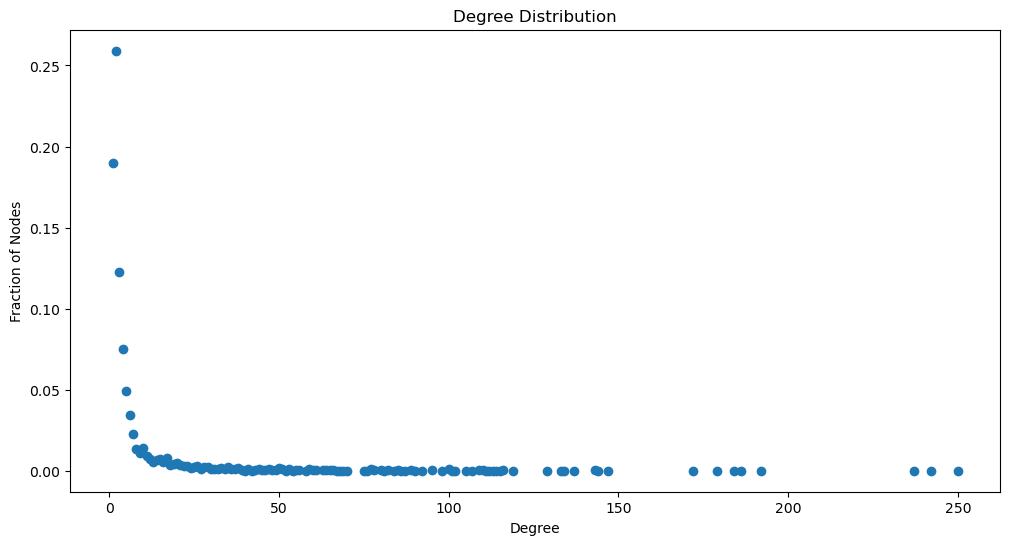

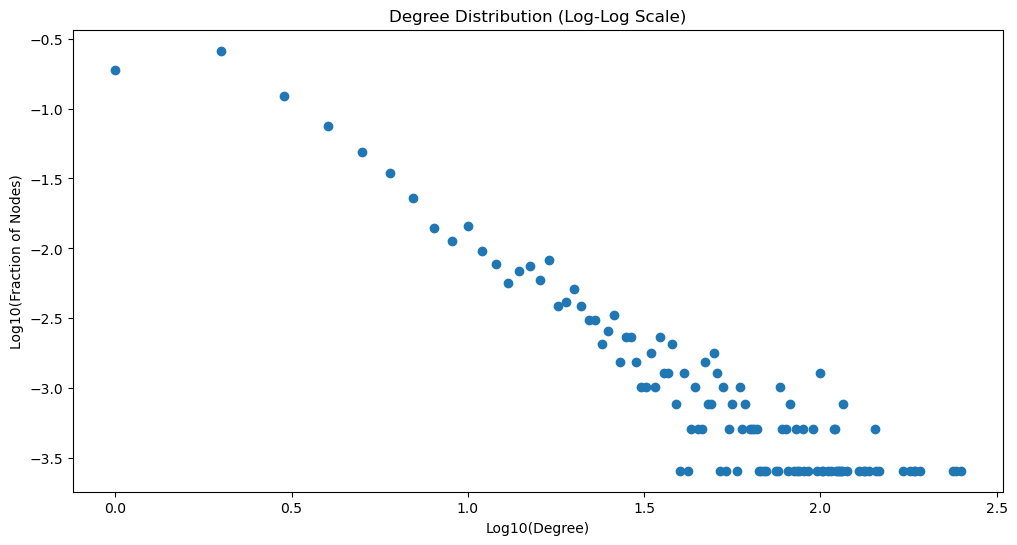

In [22]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

# Calculate the degree of nodes
degree_sequence = [d for n, d in G_largest.degree()]
degree_counts = {}
for degree in degree_sequence:
    degree_counts[degree] = degree_counts.get(degree, 0) + 1

# Compute the degree distribution (x, y)
x_values = sorted(degree_counts.keys())
y_values = [degree_counts[degree] / G.number_of_nodes() for degree in x_values]

# Filter out data points where y = 0 (if any)
filtered_x = [x for x, y in zip(x_values, y_values) if y > 0]
filtered_y = [y for y in y_values if y > 0]

# Plot the standard degree distribution
plt.figure(figsize=(12, 6))
plt.plot(filtered_x, filtered_y, marker="o", linestyle="none")
plt.xlabel("Degree")
plt.ylabel("Fraction of Nodes")
plt.title("Degree Distribution")
plt.show()

# Convert to log-log scale
log_x = np.log10(filtered_x)
log_y = np.log10(filtered_y)

# Plot the degree distribution in log-log scale
plt.figure(figsize=(12, 6))
plt.plot(log_x, log_y, marker='o', linestyle="none")
plt.xlabel("Log10(Degree)")
plt.ylabel("Log10(Fraction of Nodes)")
plt.title("Degree Distribution (Log-Log Scale)")
plt.show()

In [7]:
# Calculate the diameter of the giant component
diameter = nx.diameter(G_largest)
print(f"Diameter of the giant component: {diameter}")

# Find the longest shortest path corresponding to the diameter
# First, find the shortest path lengths between all pairs of nodes
all_shortest_paths = dict(nx.all_pairs_shortest_path_length(G_largest))

# Find the two nodes that correspond to the diameter
source, target = None, None
for node, lengths in all_shortest_paths.items():
    for other_node, path_length in lengths.items():
        if path_length == diameter:
            source, target = node, other_node
            break
    if source and target:
        break

# Get the list of nodes in the longest shortest path
longest_path = nx.shortest_path(G_largest, source=source, target=target)
longest_path_cities = [city_mapping[node] for node in longest_path]

print("Longest shortest path between two cities:")
print(" -> ".join(longest_path_cities))

Diameter of the giant component: 17
Longest shortest path between two cities:
Brize Norton -> Georgetown (XV) -> Mount Pleasant -> Punta Arenas -> Concepcion (CL) -> Santiago (CL) -> Buenos Aires -> Auckland -> Brisbane -> Port Moresby -> Lae -> Indagen -> Konge -> Kabwum -> Satwag -> Derim -> Yalumet -> Wasu


In [8]:
# Find the node IDs for Canberra and Cape Town
cbr_node = cities[cities["Name"] == "Canberra"]["ID"].values[0]
cpt_node = cities[cities["Name"] == "Cape Town"]["ID"].values[0]

# Calculate the shortest path
shortest_path = nx.shortest_path(G_largest, source=cbr_node, target=cpt_node)
shortest_path_cities = [city_mapping[node] for node in shortest_path]

print("Shortest path from Canberra to Cape Town:")
print(" -> ".join(shortest_path_cities))

Shortest path from Canberra to Cape Town:
Canberra -> Melbourne (AU) -> Mauritius -> Cape Town


In [14]:
# Calculate betweenness centrality
betweenness = nx.betweenness_centrality(G_largest)
sorted_betweenness = sorted(betweenness.items(), key=lambda x: x[1], reverse=True)

# Get the city names and betweenness values of the top 10 nodes
top_10_betweenness = [(city_mapping[node], centrality) for node, centrality in sorted_betweenness[:10]]
print("Top 10 cities by betweenness centrality:")
for city, centrality in top_10_betweenness:
    print(f"{city}: {centrality:.6f}")

Top 10 cities by betweenness centrality:
Paris: 0.093420
London (GB): 0.084989
Anchorage: 0.081523
Singapore: 0.075362
New York: 0.069283
Los Angeles (US): 0.066250
Frankfurt: 0.065578
Port Moresby: 0.064323
Tokyo: 0.060243
Seattle: 0.052379
